In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [4]:
#file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
#file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/Banks.csv'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_Banks = '../Datasets/Banks.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño',
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [8]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

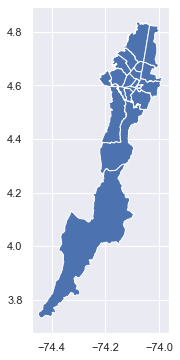

In [9]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base TM

In [10]:
df_banks = pd.read_csv(filepath_Banks, usecols=[1,2,3,4,5])
df_banks

,bank_key,bank_name,bank_address,bank_latitude,bank_longitude
0,bancamia,Bancamía Primera de Mayo,Transversal 78H # 44A-05 Sur,4.614796,-74.163879
1,bancamia,Bancamía Molinos,Calle 50A # 7 - 21 Sur,4.556724,-74.121086
2,bancamia,Bancamia Calle 13,Calle 13 # 13-77,4.716340,-74.212659
3,bancamia,Bancamia Calle 17,Calle 17 # 100-16,4.673042,-74.146030
4,bancamia,Bancamía - Engativá,Carrera 113B # 63I-39,4.709021,-74.139672
...,...,...,...,...,...
908,scotiabank-colpatria,Cajero Automatico Scotiabank Colpatria Jumbo,Carrera 32 # 17B-04,4.618507,-74.090487
909,scotiabank-colpatria,Scotiabank Colpatria Niza,Carrera 55A # 125B-20,4.711541,-74.073912
910,scotiabank-colpatria,Scotiabank Colpatria Puente Aranda,Calle 13 # 65-71,4.634853,-74.115552
911,scotiabank-colpatria,Scotiabank Colpatria Avenida El Dorado,Avenida El Dorado # 100-55,4.688043,-74.129765


In [11]:
df_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bank_key        913 non-null    object 
 1   bank_name       913 non-null    object 
 2   bank_address    913 non-null    object 
 3   bank_latitude   913 non-null    float64
 4   bank_longitude  913 non-null    float64
dtypes: float64(2), object(3)
memory usage: 35.8+ KB


In [12]:
gdf = gpd.GeoDataFrame(df_banks, geometry=gpd.points_from_xy(df_banks.bank_longitude, df_banks.bank_latitude))
gdf

,bank_key,bank_name,bank_address,bank_latitude,bank_longitude,geometry
0,bancamia,Bancamía Primera de Mayo,Transversal 78H # 44A-05 Sur,4.614796,-74.163879,POINT (-74.16388 4.61480)
1,bancamia,Bancamía Molinos,Calle 50A # 7 - 21 Sur,4.556724,-74.121086,POINT (-74.12109 4.55672)
2,bancamia,Bancamia Calle 13,Calle 13 # 13-77,4.716340,-74.212659,POINT (-74.21266 4.71634)
3,bancamia,Bancamia Calle 17,Calle 17 # 100-16,4.673042,-74.146030,POINT (-74.14603 4.67304)
4,bancamia,Bancamía - Engativá,Carrera 113B # 63I-39,4.709021,-74.139672,POINT (-74.13967 4.70902)
...,...,...,...,...,...,...
908,scotiabank-colpatria,Cajero Automatico Scotiabank Colpatria Jumbo,Carrera 32 # 17B-04,4.618507,-74.090487,POINT (-74.09049 4.61851)
909,scotiabank-colpatria,Scotiabank Colpatria Niza,Carrera 55A # 125B-20,4.711541,-74.073912,POINT (-74.07391 4.71154)
910,scotiabank-colpatria,Scotiabank Colpatria Puente Aranda,Calle 13 # 65-71,4.634853,-74.115552,POINT (-74.11555 4.63485)
911,scotiabank-colpatria,Scotiabank Colpatria Avenida El Dorado,Avenida El Dorado # 100-55,4.688043,-74.129765,POINT (-74.12977 4.68804)


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bank_key        913 non-null    object  
 1   bank_name       913 non-null    object  
 2   bank_address    913 non-null    object  
 3   bank_latitude   913 non-null    float64 
 4   bank_longitude  913 non-null    float64 
 5   geometry        913 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 42.9+ KB


In [14]:
basebanks = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
basebanks

,bank_key,bank_name,bank_address,bank_latitude,bank_longitude,geometry,index_right,Localidad
0,bancamia,Bancamía Primera de Mayo,Transversal 78H # 44A-05 Sur,4.614796,-74.163879,POINT (-74.16388 4.61480),9.0,Kennedy
1,bancamia,Bancamía Molinos,Calle 50A # 7 - 21 Sur,4.556724,-74.121086,POINT (-74.12109 4.55672),8.0,Rafael Uribe Uribe
2,bancamia,Bancamia Calle 13,Calle 13 # 13-77,4.716340,-74.212659,POINT (-74.21266 4.71634),NaN,NaN
3,bancamia,Bancamia Calle 17,Calle 17 # 100-16,4.673042,-74.146030,POINT (-74.14603 4.67304),2.0,Fontibón
4,bancamia,Bancamía - Engativá,Carrera 113B # 63I-39,4.709021,-74.139672,POINT (-74.13967 4.70902),3.0,Engativá
...,...,...,...,...,...,...,...,...
908,scotiabank-colpatria,Cajero Automatico Scotiabank Colpatria Jumbo,Carrera 32 # 17B-04,4.618507,-74.090487,POINT (-74.09049 4.61851),19.0,Puente Aranda
909,scotiabank-colpatria,Scotiabank Colpatria Niza,Carrera 55A # 125B-20,4.711541,-74.073912,POINT (-74.07391 4.71154),7.0,Suba
910,scotiabank-colpatria,Scotiabank Colpatria Puente Aranda,Calle 13 # 65-71,4.634853,-74.115552,POINT (-74.11555 4.63485),19.0,Puente Aranda
911,scotiabank-colpatria,Scotiabank Colpatria Avenida El Dorado,Avenida El Dorado # 100-55,4.688043,-74.129765,POINT (-74.12977 4.68804),2.0,Fontibón


In [15]:
basebanks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bank_key        913 non-null    object  
 1   bank_name       913 non-null    object  
 2   bank_address    913 non-null    object  
 3   bank_latitude   913 non-null    float64 
 4   bank_longitude  913 non-null    float64 
 5   geometry        913 non-null    geometry
 6   index_right     879 non-null    float64 
 7   Localidad       879 non-null    object  
dtypes: float64(3), geometry(1), object(4)
memory usage: 64.2+ KB


<AxesSubplot:>

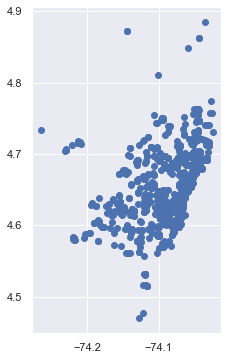

In [16]:
basebanks.geometry.plot(figsize=(12,6))

In [20]:
bankslocalidades = pd.DataFrame(basebanks.drop(columns=['index_right','geometry']))

In [21]:
bankslocalidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bank_key        913 non-null    object 
 1   bank_name       913 non-null    object 
 2   bank_address    913 non-null    object 
 3   bank_latitude   913 non-null    float64
 4   bank_longitude  913 non-null    float64
 5   Localidad       879 non-null    object 
dtypes: float64(2), object(4)
memory usage: 49.9+ KB


In [22]:
bankslocalidades.to_csv('../Datasets Clean/bankslocalidades.csv',index=False)